In [ ]:
import random
import math
def random_division(k):
    division_points = sorted([random.uniform(0, 1) for _ in range(k - 1)])
    division_points = [0] + division_points + [1]
    divisions = [division_points[i+1] - division_points[i] for i in range(k)]
    return divisions

In [ ]:
Ks = []
Hs = []
Ms = []
ks = []

ratios = []
bs_sums = []
no_bs_sums = []
for i in range(10000):
  K = random.randint(2, 10)
  M = random.randint(3, 30)
  H = random.randint(2, 2*M)

  divisions = random_division(K)
  min_prob = 0
  while(min_prob <= 1/(K*M)):
    divisions = random_division(K)
    min_prob = min(divisions)

  no_bs_sum = 0
  bs_sum = 0

  for i in range(1,H):
    alt = (-1)**(i + 1)
    com = math.comb(H, i)
    divs = 0
    for kj in divisions:
      divs = divs + ((1/kj) ** (i - 1))
    no_bs = ((alt * com) / (M ** (i - 1)))
    bs = ((alt * com * divs)/((K**i) * (M ** (i - 1))))
    no_bs_sum += no_bs
    bs_sum = bs_sum + bs

  bs_sums.append(bs_sum)
  no_bs_sums.append(no_bs_sum)
  ratios.append(no_bs_sum / bs_sum)



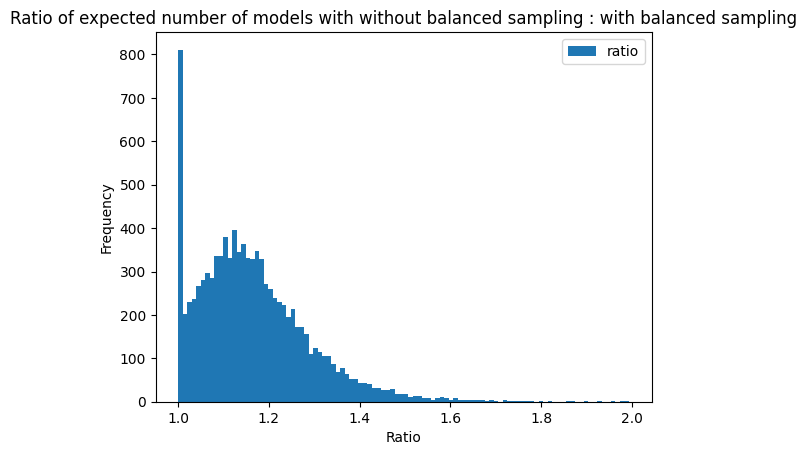

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(ratios, bins=100,  label='ratio')

plt.title('Ratio of expected number of models with without balanced sampling : with balanced sampling')
plt.xlabel('Ratio')
plt.ylabel('Frequency')

plt.legend()

plt.show()